In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/home/purno/Downloads/diabetes_dataset.csv")
df.head()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104.0,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74.0,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0


### Basic Overview

- Shape
- info
- missing
- statistics

### Numerical Varaible Analysis

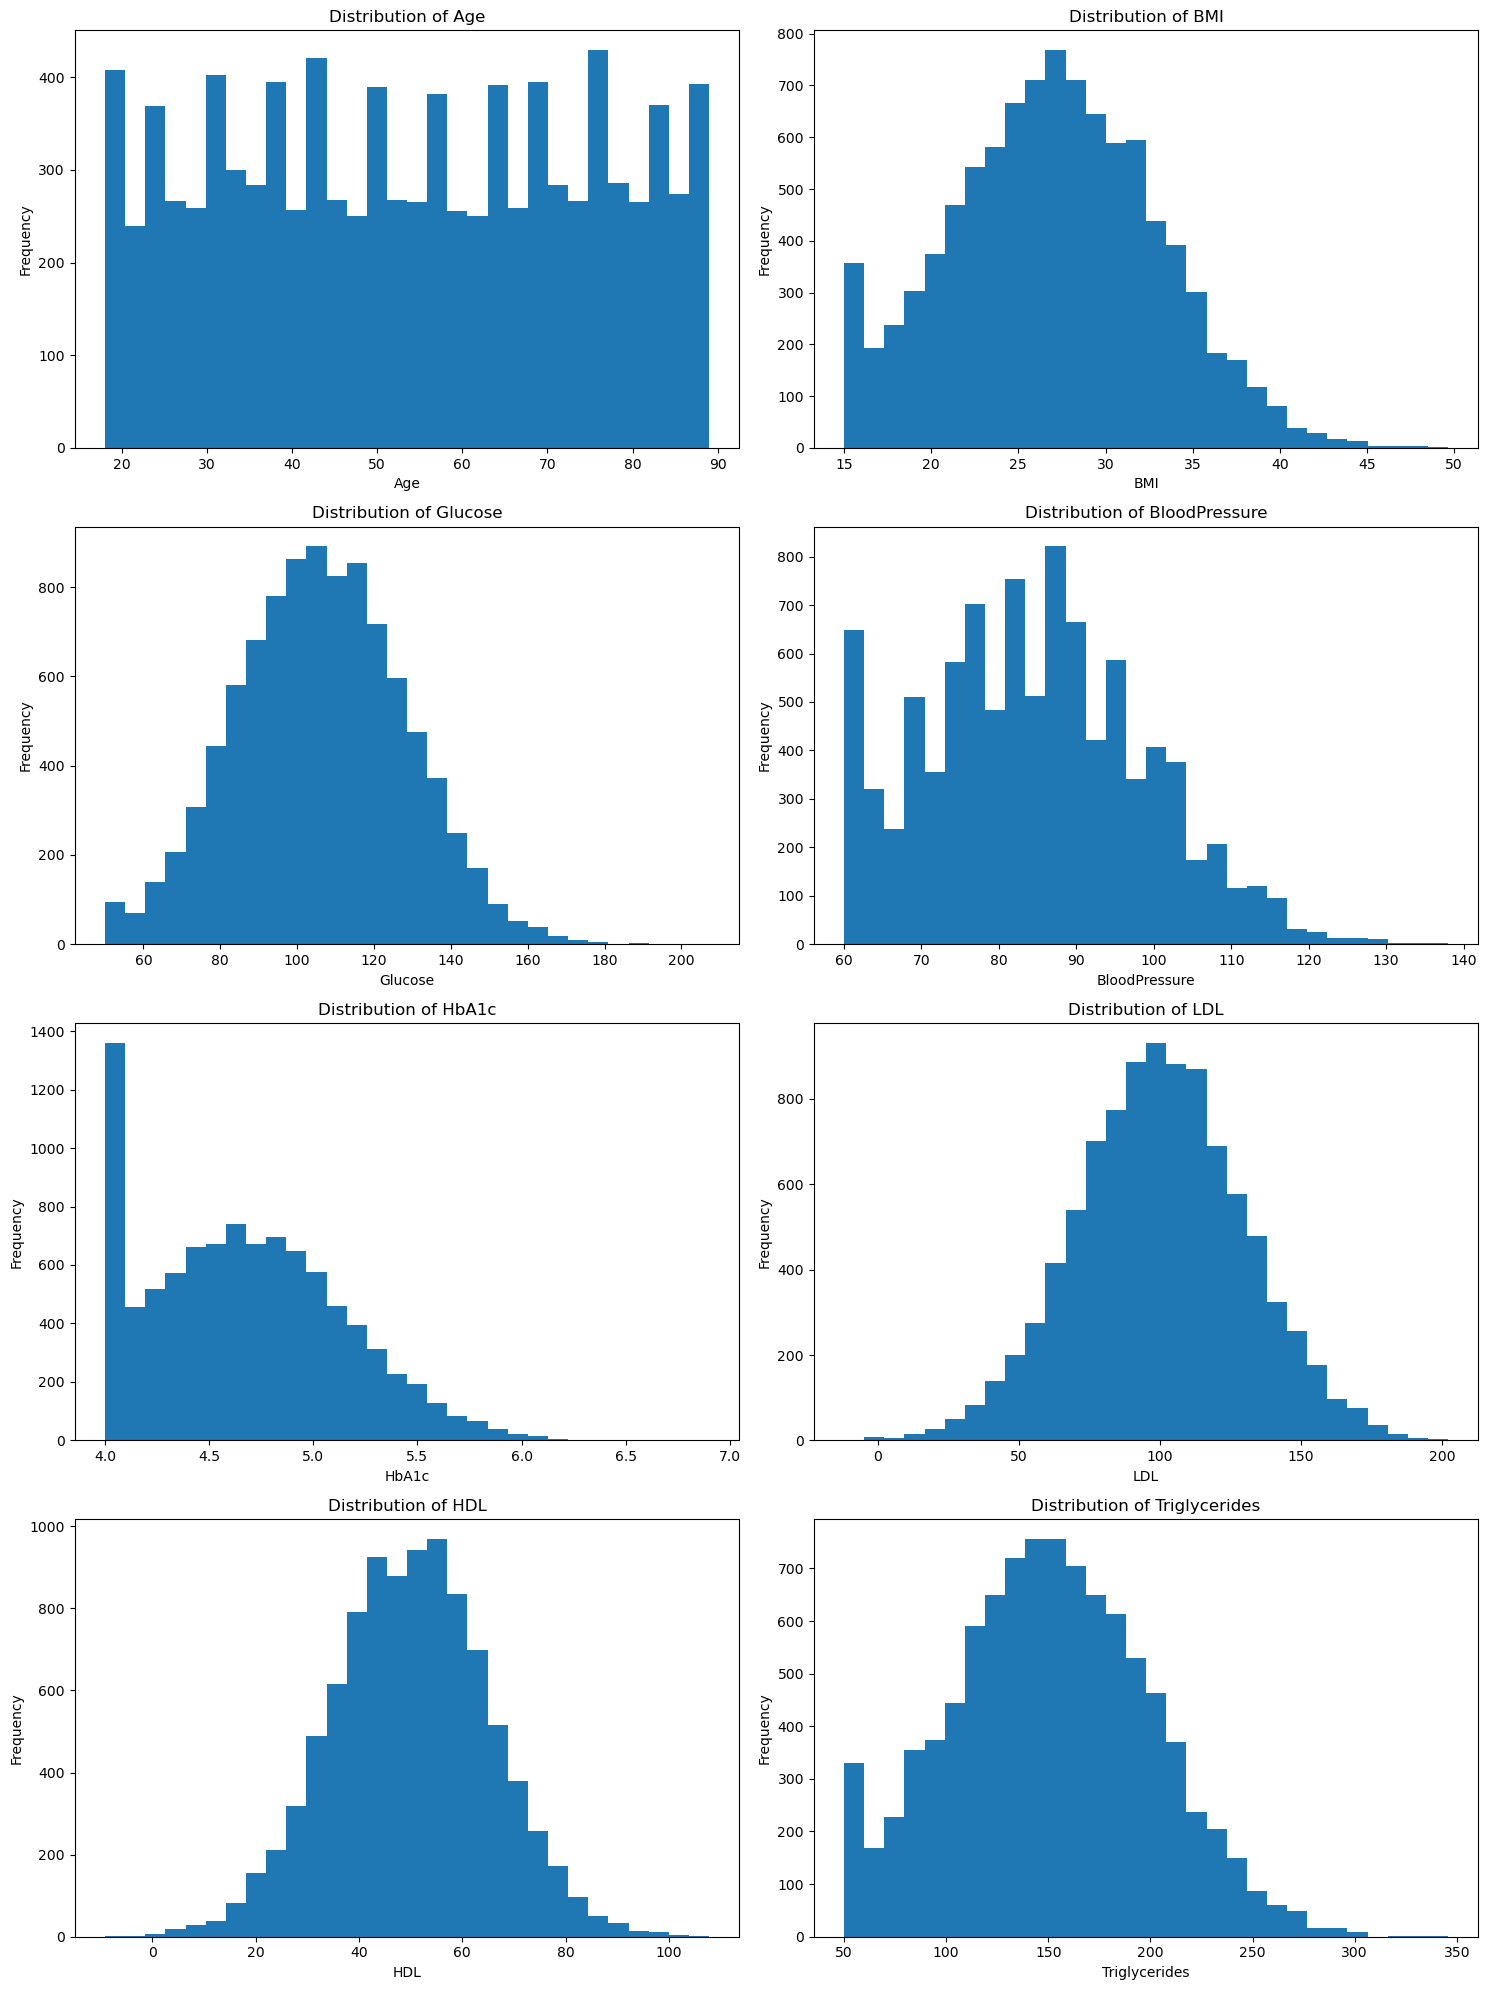

In [5]:

# Create histograms for numerical variables
numerical_cols = ['Age', 'BMI', 'Glucose', 'BloodPressure', 'HbA1c', 'LDL', 'HDL', 'Triglycerides']
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=30)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

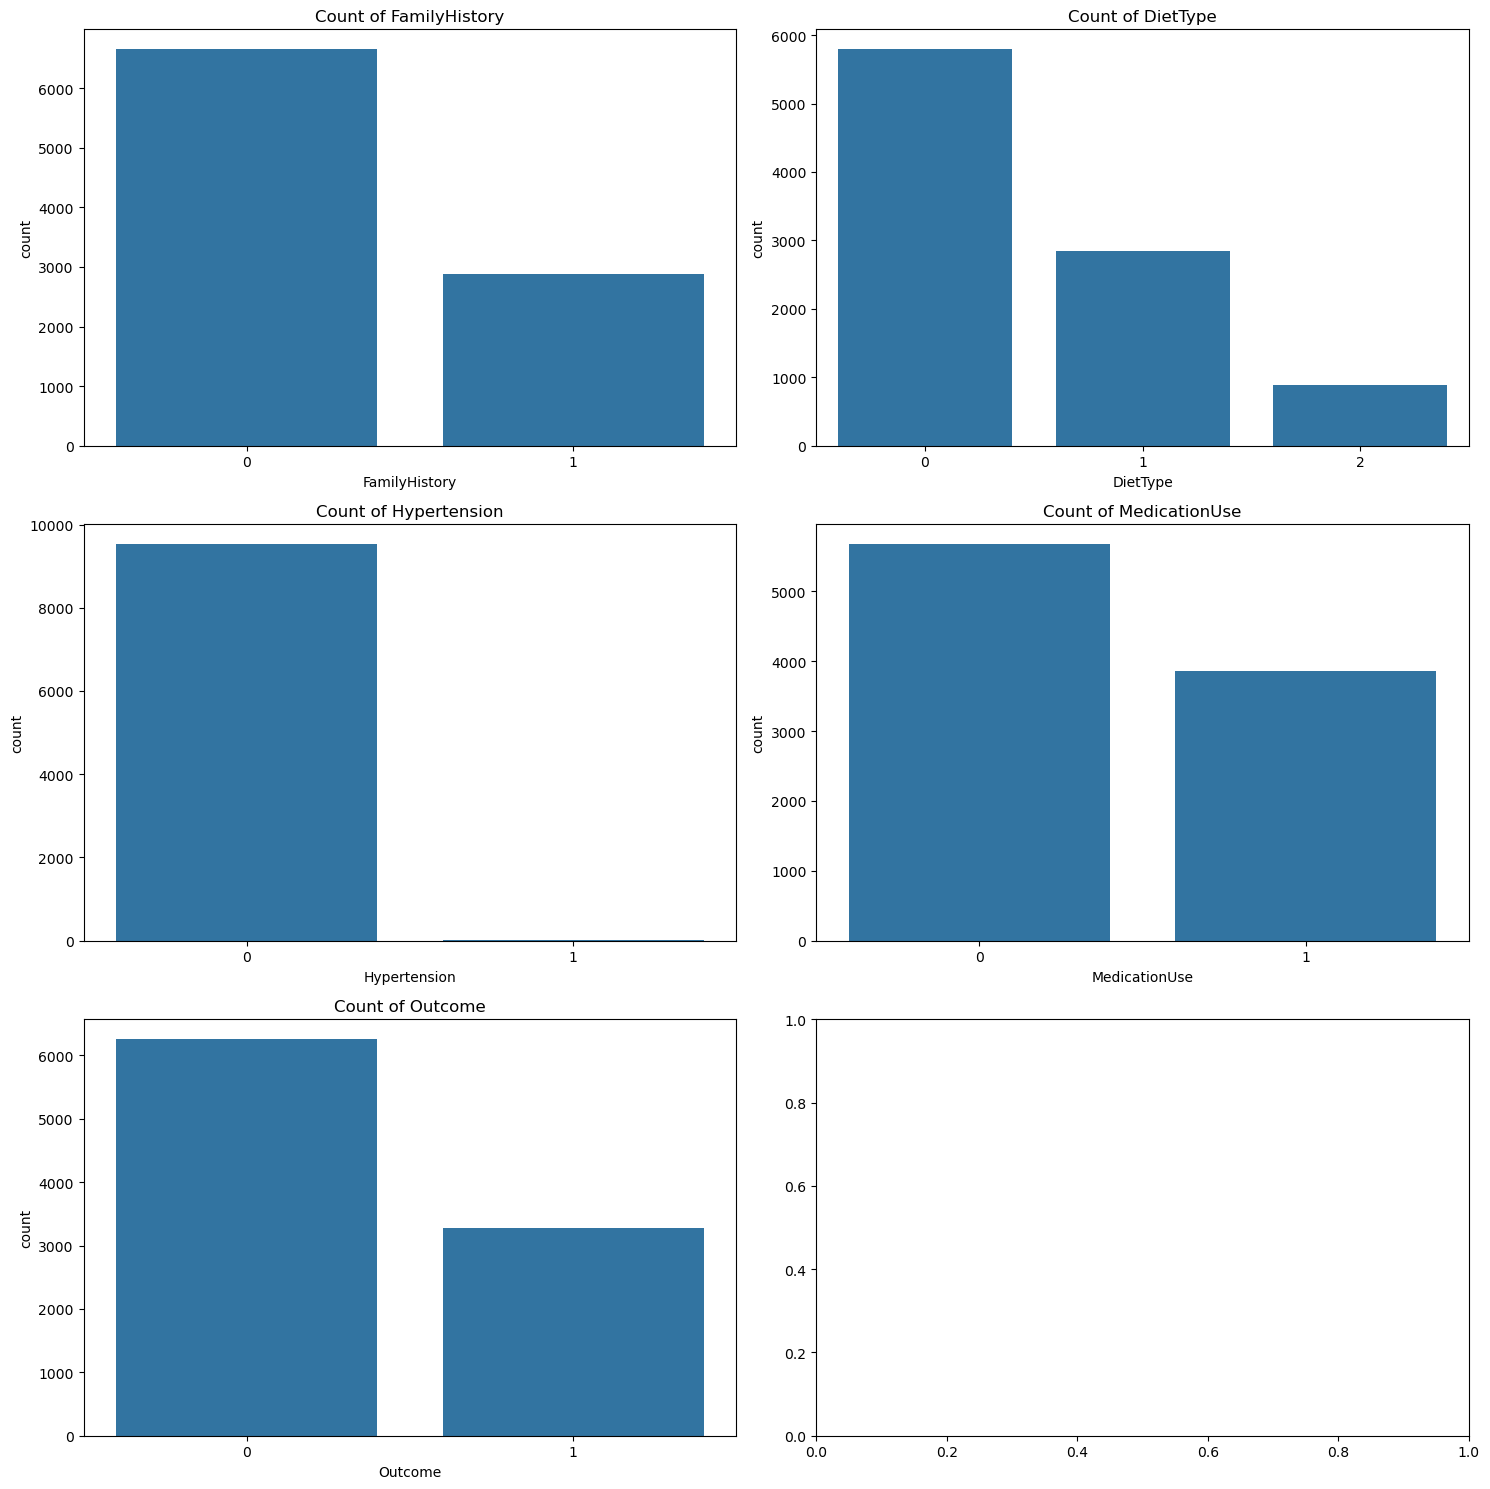

In [7]:
import seaborn as sns
categorical_cols = ['FamilyHistory', 'DietType', 'Hypertension', 'MedicationUse', 'Outcome']
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[idx])
    axes[idx].set_title(f'Count of {col}')
plt.tight_layout()
plt.show()

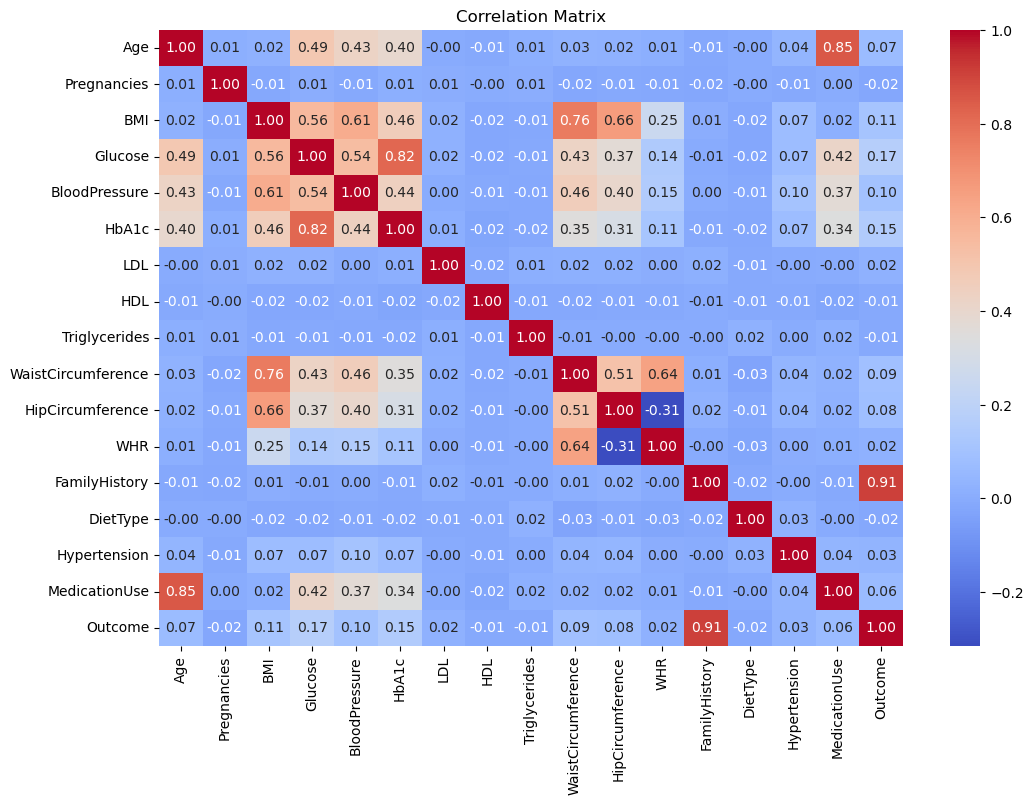

In [8]:
# 4. Correlation Analysis
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

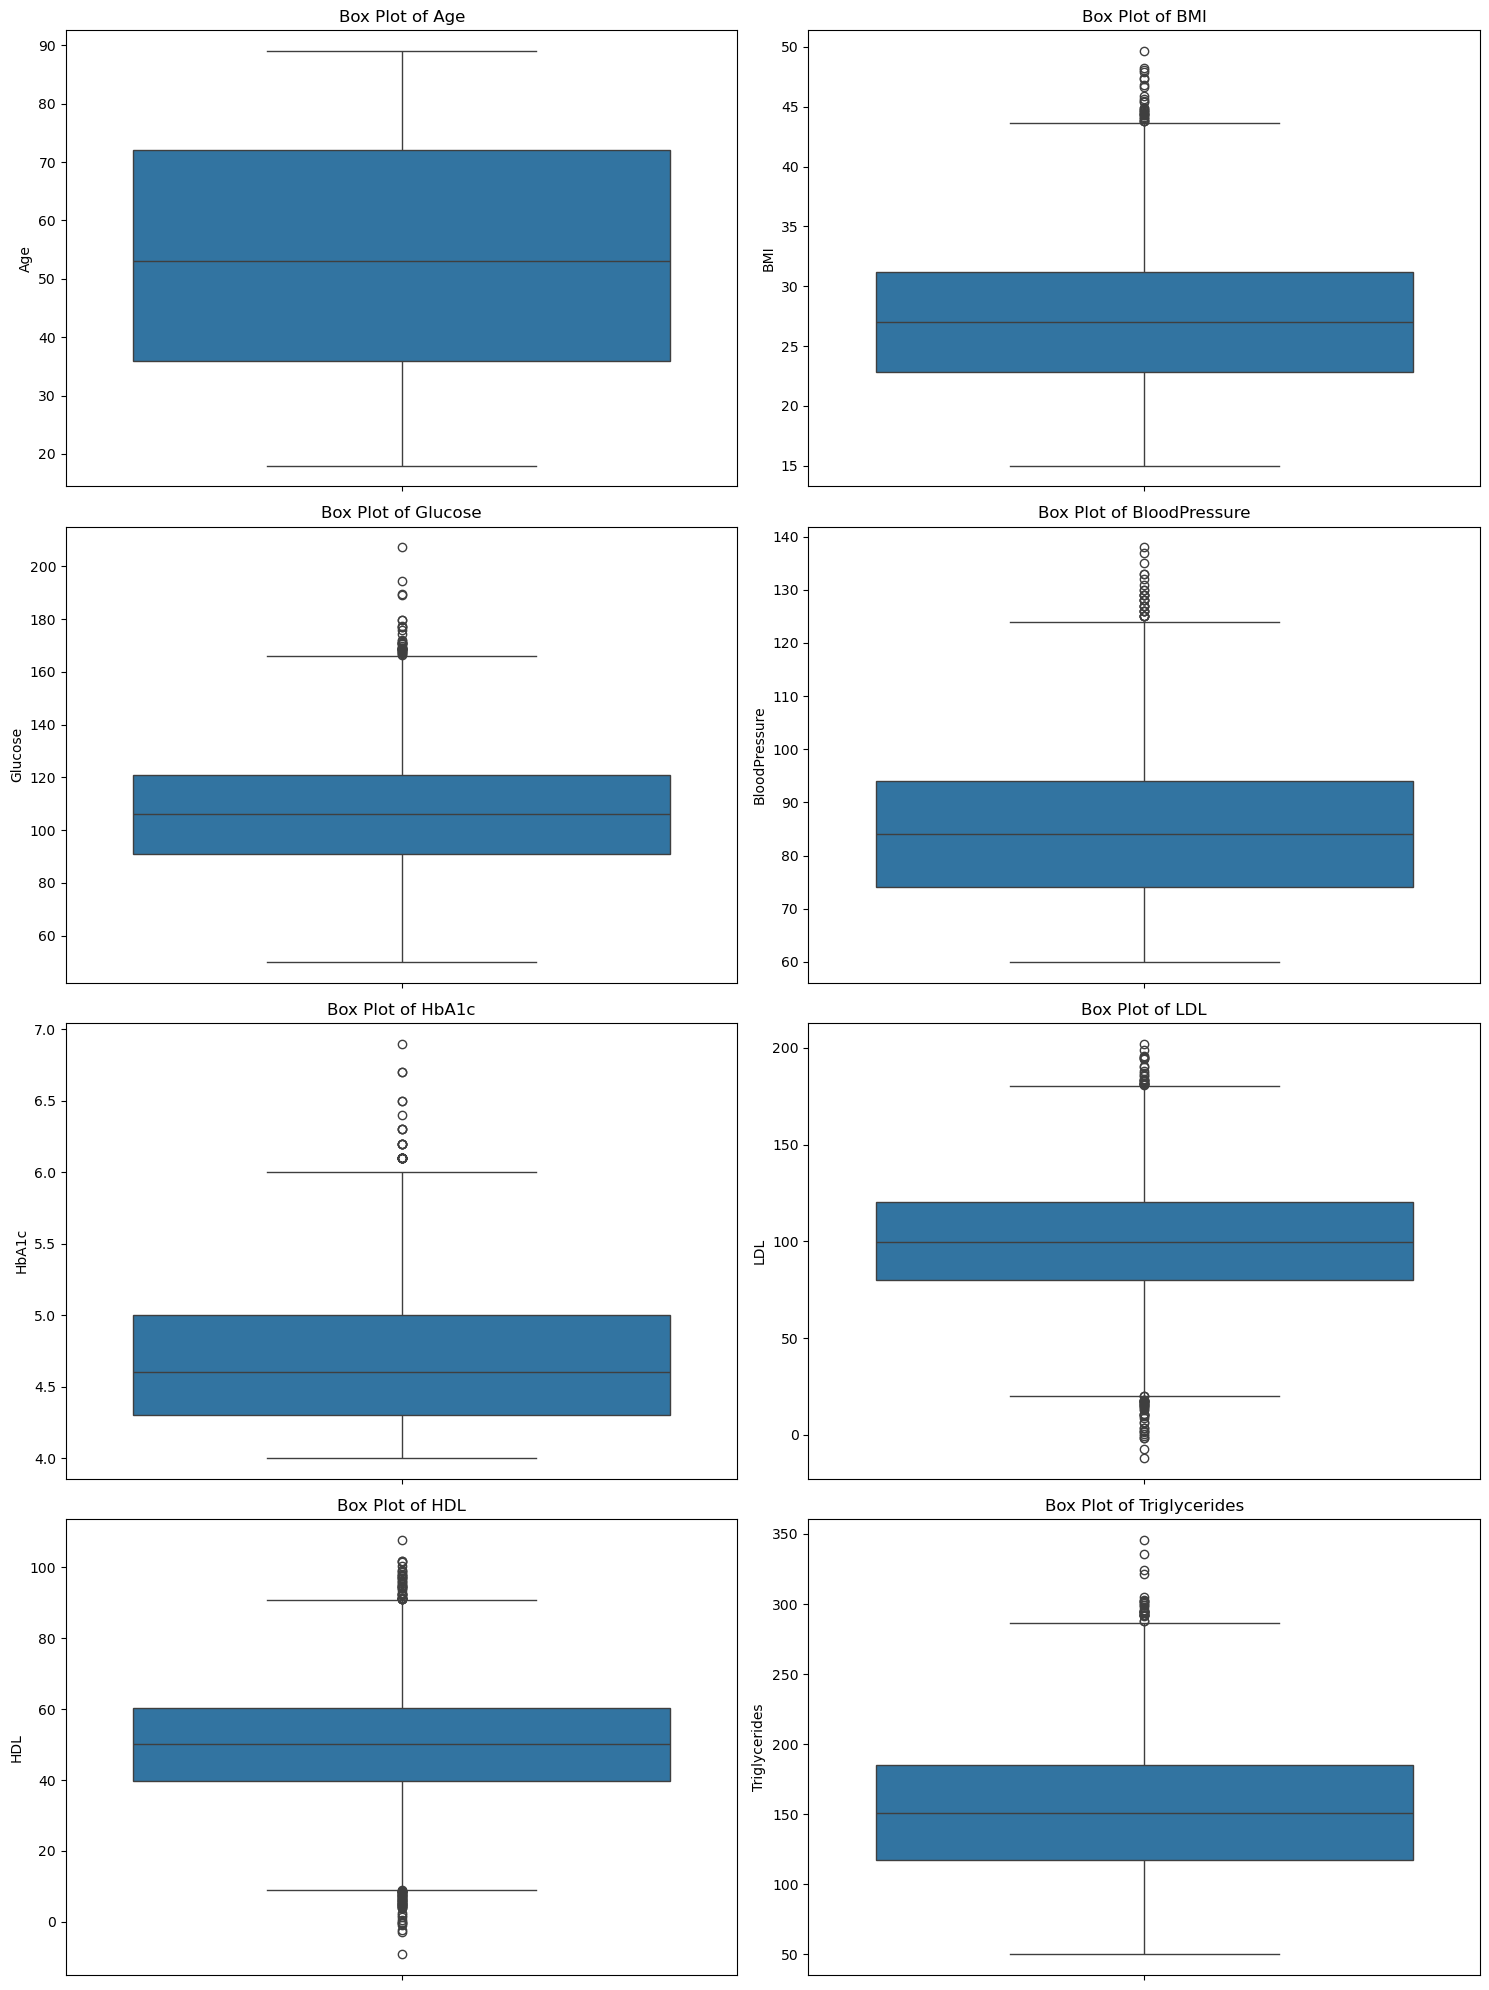

In [9]:
# 5. Box Plots to detect outliers
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    sns.boxplot(data=df, y=col, ax=axes[idx])
    axes[idx].set_title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

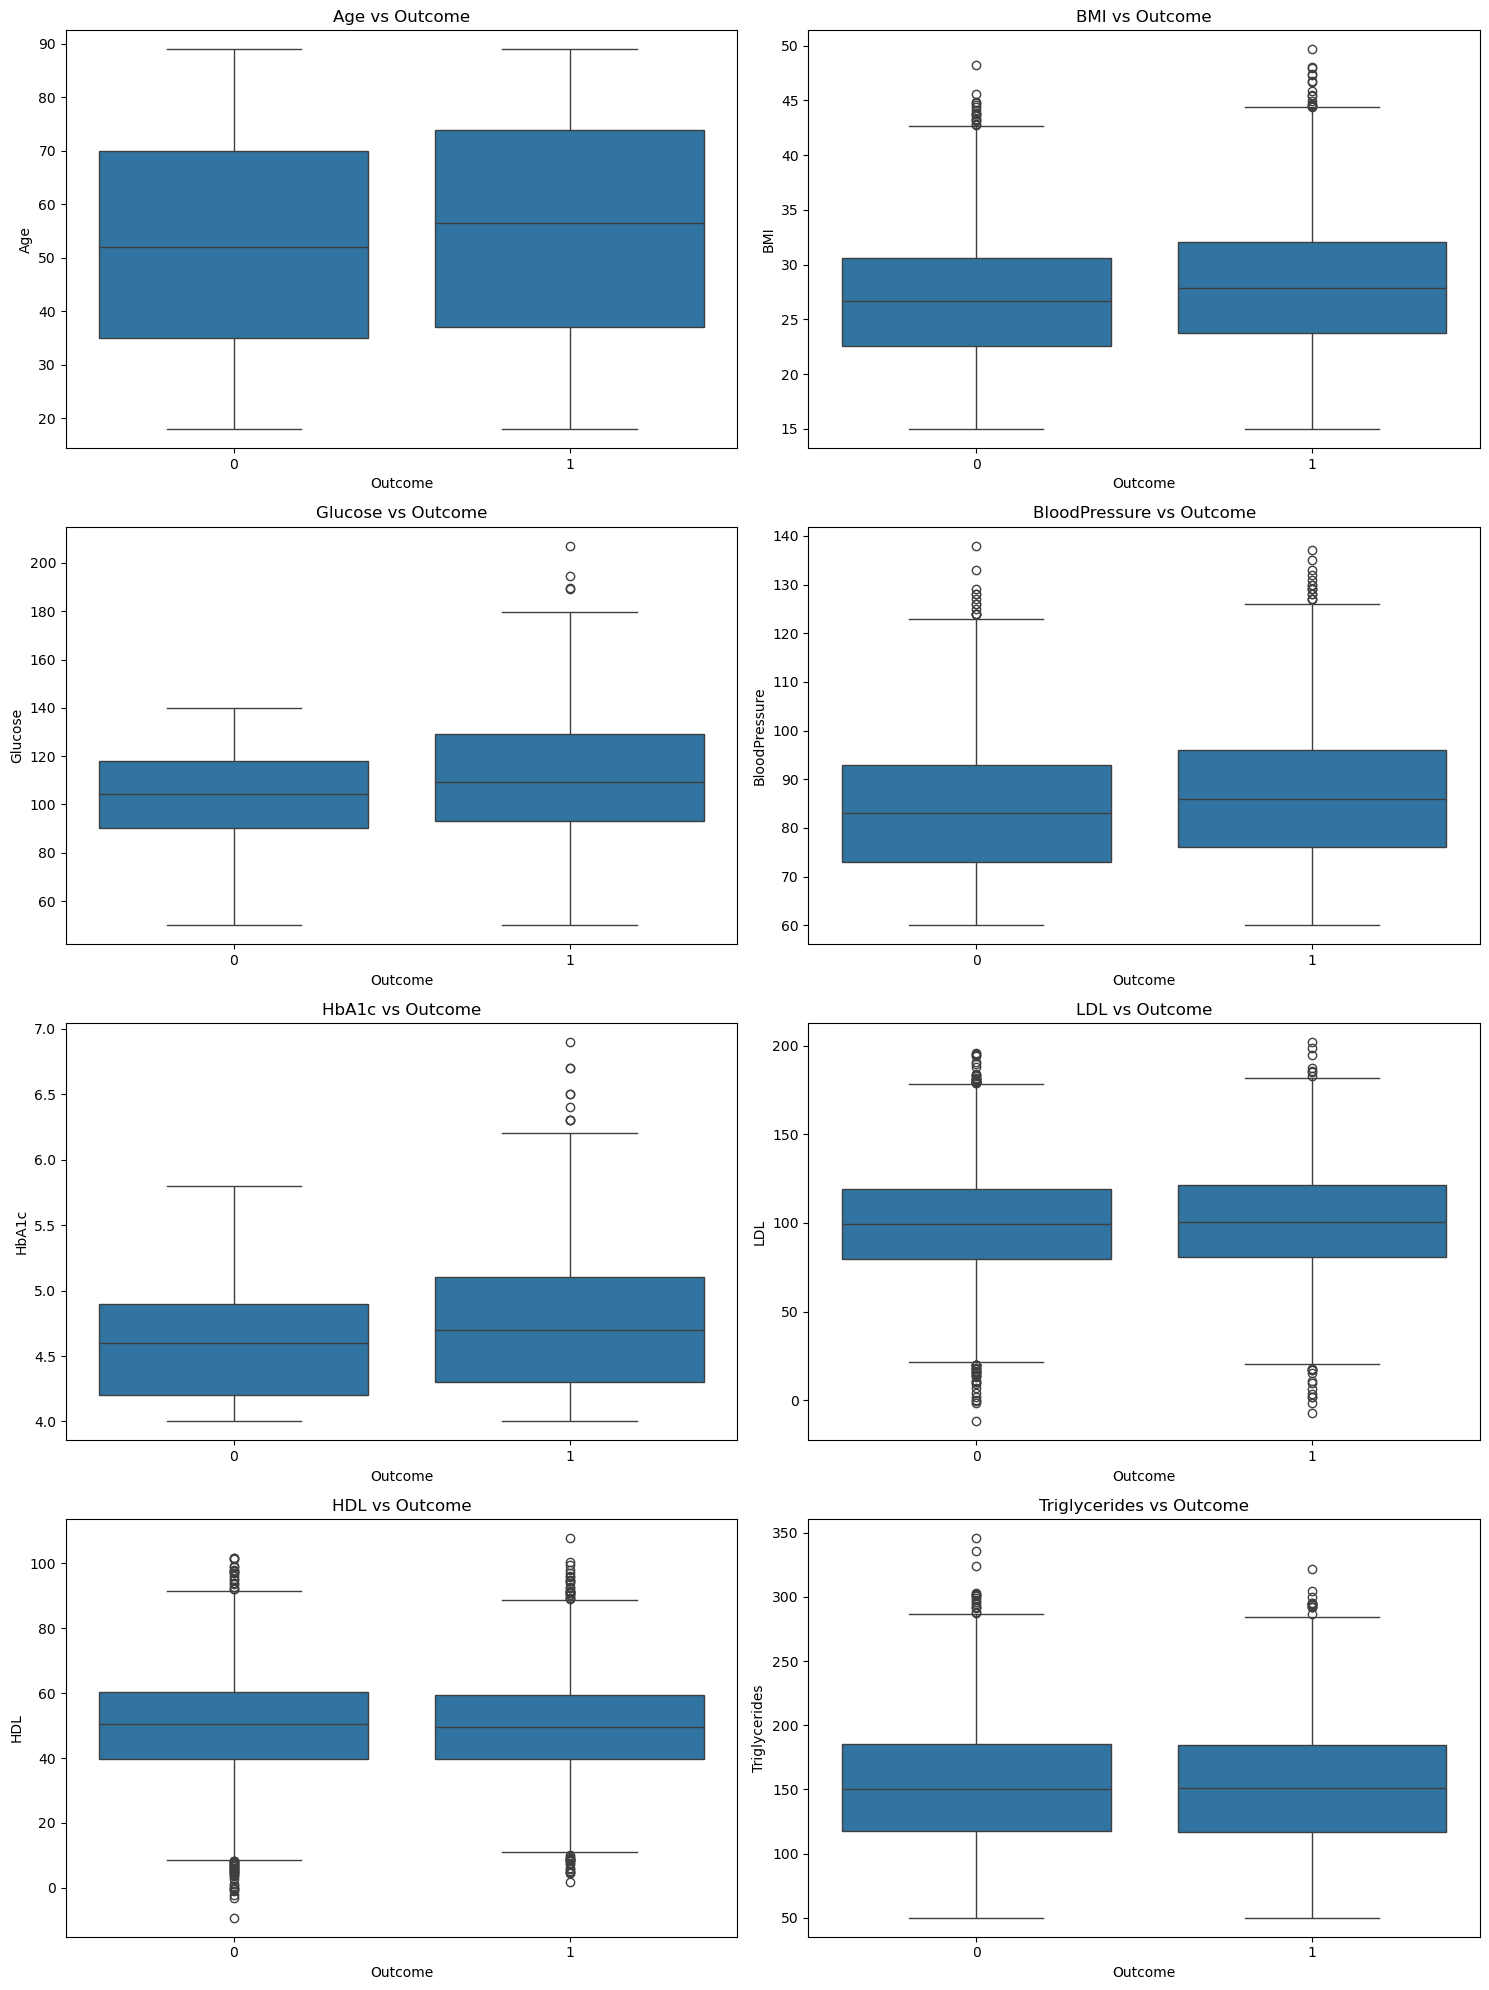

In [10]:
# 6. Relationship between variables and Outcome
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x='Outcome', y=col, ax=axes[idx])
    axes[idx].set_title(f'{col} vs Outcome')
plt.tight_layout()
plt.show()

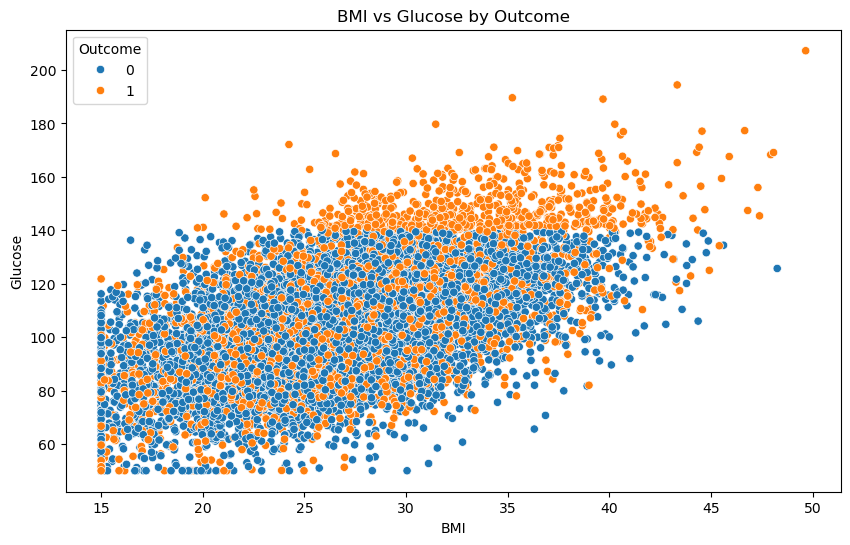

In [11]:
# 7. Scatter plots for key relationships
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BMI', y='Glucose', hue='Outcome')
plt.title('BMI vs Glucose by Outcome')
plt.show()

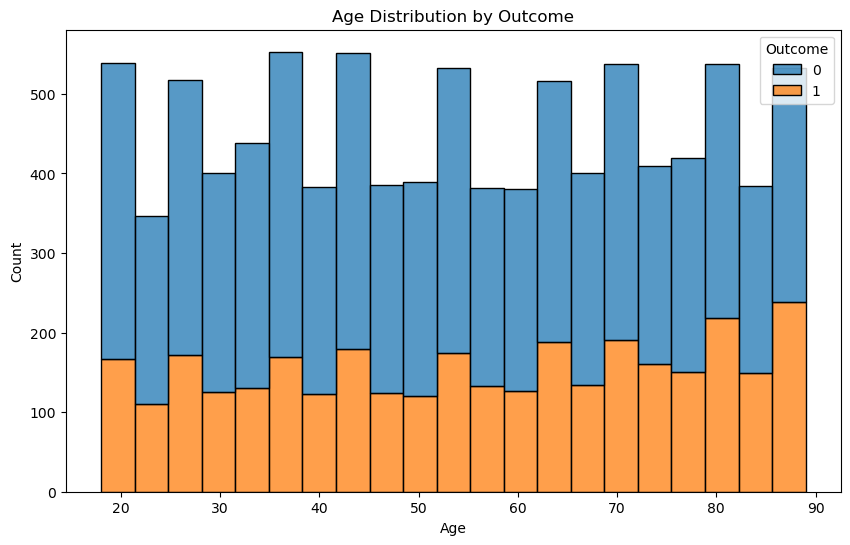

In [12]:
# 8. Age distribution by Outcome
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Outcome', multiple='stack')
plt.title('Age Distribution by Outcome')
plt.show()

In [13]:
# 9. Summary statistics by Outcome
print("\nSummary Statistics by Outcome:")
print(df.groupby('Outcome')[numerical_cols].mean())


Summary Statistics by Outcome:
               Age        BMI     Glucose  BloodPressure     HbA1c  \
Outcome                                                              
0        52.548114  26.591905  103.432049      83.490090  4.598386   
1        55.539915  27.930070  111.197684      86.354662  4.750305   

                LDL        HDL  Triglycerides  
Outcome                                        
0         99.711061  50.050975     151.448657  
1        100.938605  49.767459     150.574162  


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 9538 non-null   int64  
 1   Pregnancies         9538 non-null   int64  
 2   BMI                 9538 non-null   float64
 3   Glucose             9538 non-null   float64
 4   BloodPressure       9538 non-null   float64
 5   HbA1c               9538 non-null   float64
 6   LDL                 9538 non-null   float64
 7   HDL                 9538 non-null   float64
 8   Triglycerides       9538 non-null   float64
 9   WaistCircumference  9538 non-null   float64
 10  HipCircumference    9538 non-null   float64
 11  WHR                 9538 non-null   float64
 12  FamilyHistory       9538 non-null   int64  
 13  DietType            9538 non-null   int64  
 14  Hypertension        9538 non-null   int64  
 15  MedicationUse       9538 non-null   int64  
 16  Outcom

<Axes: xlabel='Pregnancies', ylabel='count'>

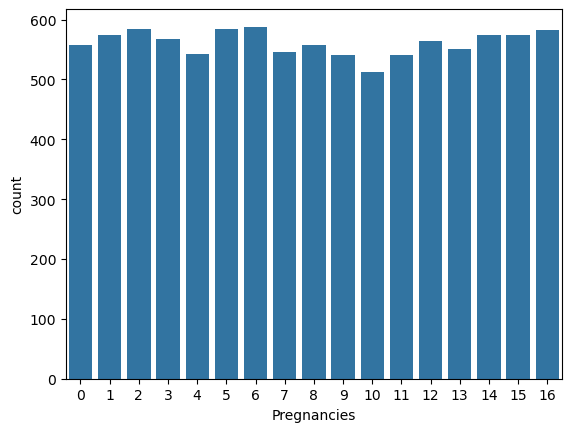

In [20]:
sns.barplot(df["Pregnancies"].value_counts())

In [21]:
(df == 0).sum()

Age                      0
Pregnancies            557
BMI                      0
Glucose                  0
BloodPressure            0
HbA1c                    0
LDL                      0
HDL                      1
Triglycerides            0
WaistCircumference       0
HipCircumference         0
WHR                      0
FamilyHistory         6653
DietType              5794
Hypertension          9528
MedicationUse         5675
Outcome               6256
dtype: int64

In [25]:
df["HDL"].mean()

np.float64(49.9534179073181)

In [28]:
pd.get_dummies(df, columns=["Pregnancies"])

,Age,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,...,Pregnancies_7,Pregnancies_8,Pregnancies_9,Pregnancies_10,Pregnancies_11,Pregnancies_12,Pregnancies_13,Pregnancies_14,Pregnancies_15,Pregnancies_16
0,69,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,...,False,False,False,False,False,False,False,False,False,False
1,32,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,...,False,False,False,False,False,False,False,False,False,False
2,89,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,...,False,False,False,False,False,False,True,False,False,False
3,78,29.91,146.0,104.0,5.7,50.7,39.1,117.0,108.9,110.0,...,False,False,False,False,False,False,True,False,False,False
4,38,24.56,103.2,74.0,4.7,102.5,29.1,145.9,84.1,92.8,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9533,32,23.00,102.3,62.0,4.1,109.3,47.8,76.7,86.8,115.0,...,False,False,False,False,False,False,False,False,False,False
9534,74,24.29,125.8,93.0,5.3,95.8,66.6,103.7,90.1,94.3,...,False,False,False,False,False,False,False,False,False,False
9535,75,26.10,107.6,75.0,5.0,168.5,62.3,149.8,84.0,114.9,...,False,False,False,False,False,False,False,False,False,False
9536,52,25.88,99.3,96.0,4.6,70.0,48.4,122.9,97.5,88.7,...,False,False,False,False,False,False,False,False,False,False
